# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Class_Id: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Traffic Signs Count per Class_Id: 
  [ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]


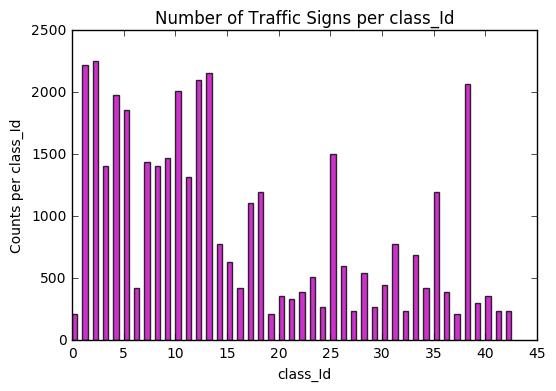

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

###################    visualize bar chart       ################################

class_index = np.unique(y_train)
print("Class_Id: \n",class_index)
inputs_per_class = np.bincount(y_train)
print("Traffic Signs Count per Class_Id: \n ", inputs_per_class)

plt.bar(class_index, inputs_per_class, 0.5, alpha = 0.8, color='m')
plt.xlabel('class_Id'); plt.ylabel('Counts per class_Id'); 
plt.title('Number of Traffic Signs per class_Id'); 
plt.show()


tracklist- [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
tracklistindex- [0, 210, 2430, 4680, 6090, 8070, 9930, 10350, 11790, 13200, 14670, 16680, 18000, 20100, 22260, 23040, 23670, 24090, 25200, 26400, 26610, 26970, 27300, 27690, 28200, 28470, 29970, 30570, 30810, 31350, 31620, 32070, 32850, 33090, 33779, 34199, 35399, 35789, 35999, 38069, 38369, 38729, 38969]
tracklistindexlength- 43


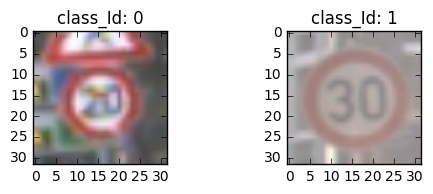

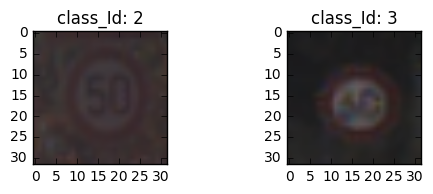

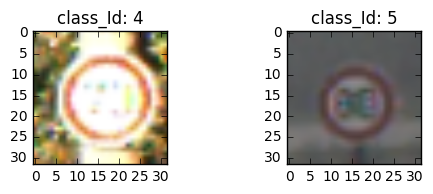

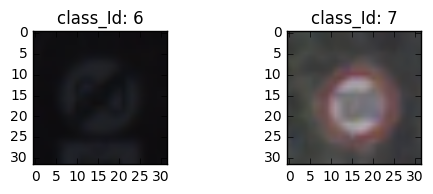

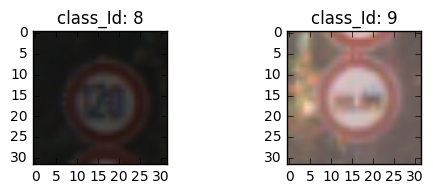

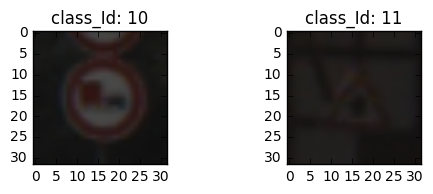

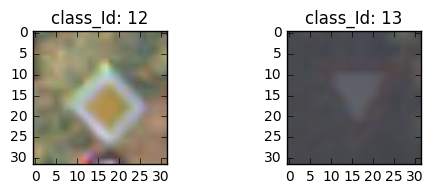

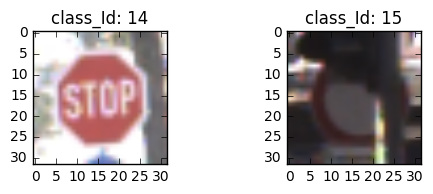

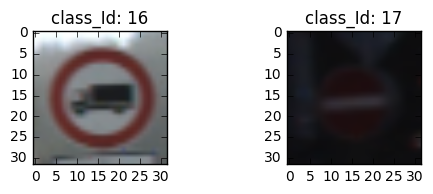

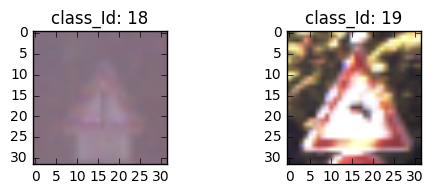

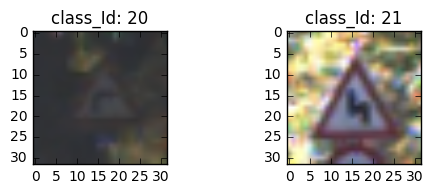

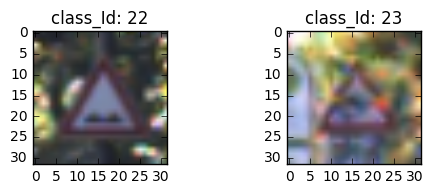

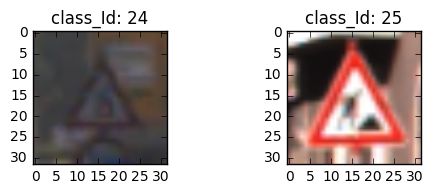

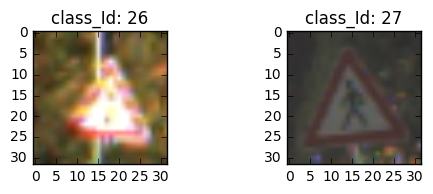

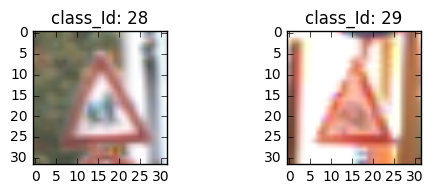

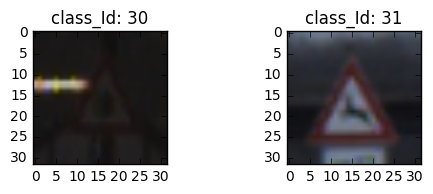

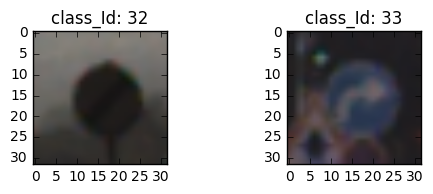

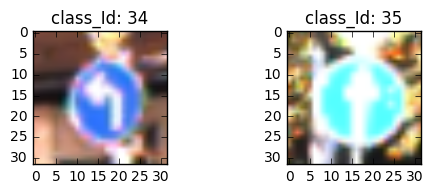

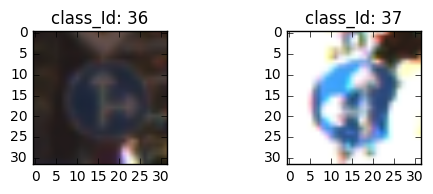

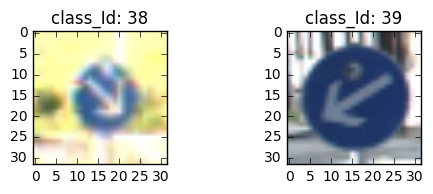

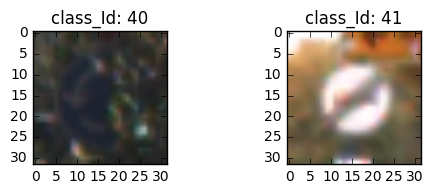

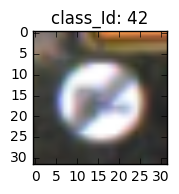

In [4]:

#################   visualize all type of traffic signs in training data set     ####################

import csv

signNames = []
with open('signnames.csv', mode='r') as f:
    next(f) # skip the first line
    reader = csv.reader(f)
    for row in reader:
        signNames.append(row[1])
#print(signNames)
        
track_list = []
track_list_index = []
index=0
for i in y_train:
    if (i not in track_list):
        track_list += [i]
        track_list_index += [index]
    index += 1
print('tracklist-',track_list)
print('tracklistindex-',track_list_index)
print('tracklistindexlength-',len(track_list_index))

for i in np.arange(0,len(track_list_index),2):
   
   plt.figure(figsize=(5,5))  
   
   plt.subplot(121)
   
   plt.imshow(X_train[track_list_index[i]]);      
   
   plt.title("class_Id: %s" % (track_list[i]));
   

   # beacuse odd no. of class_Ids (i.e 43)
  
   if (i != len(track_list_index)-1):
   
       plt.subplot(122)
       plt.imshow(X_train[track_list_index[i+1]]);
       
       plt.title("class_Id: %s" % (track_list[i+1]));
       

   
   plt.subplots_adjust(hspace=0.1, wspace=0.9)
   
   plt.show()
   

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

# Preprocess the data such that it's in the range between -0.5 and 0.5.
# TODO: Implement data normalization for X_train and X_test.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255 - 0.5
X_test = X_test / 255 - 0.5


# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I have performed data normalization around the mean zero. The reason to do preprocessing is so that the data could be of approximately same scale. There are many ways to do data normalization.  Preprocessing is used if different input features have different scales (or units), but we want them to be of approximately equal importance to the learning algorithm.  I have chosen to divide all the pixel values of image by 255 , then subtracted a constant value. I chose this method because it convert values around zero mean very quickly as it employs the properties of numpy arrays. Although I could have also converted the images into grayscale as it would reduce the channels, but to have experience with colored images and not to loose information of traffic signs based on their colors, I avoided grayscale conversion. I have seen many students using grayscale(questions on forums), but I personally chose not to employ it.  


In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

# Splitting the data into training data and validation data
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

print("Number of training examples now =", len(X_train))
print("Number of validation examples =", len(X_validation))
print("Number of training + validation examples =", len(X_train)+len(X_validation))
print("Number of testing examples =", len(X_test))


Number of training examples now = 31367
Number of validation examples = 7842
Number of training + validation examples = 39209
Number of testing examples = 12630


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I have used the "train_test_split" command to seperate out the 20 percent of data from original training set. After implementation of this method, rest 80 percent of data will become training dataset and 20 percent which is extracted out will become vaidation set. 


In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128    # can also use 32,64,256 

keep_prob = tf.placeholder(tf.float32) # probability to keep units


from tensorflow.contrib.layers import flatten

# Implement the [LeNet-5] neural network architecture.

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.05  #stddev=1e-2 from ALEXNET
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    #conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    # dropout to avoid overfitting
    conv1 = tf.nn.dropout(conv1, keep_prob)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    #conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    # dropout to avoid overfitting
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    # dropout to avoid overfitting
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
        
    
    # TODO: # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    # can write n_classes inspite of 43 to make program general 
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** I have used LENET architecture model with 2 Convolution layers and 3 Fully connected layers. The model has employed "relu" activation, "dropouts" to avoid overfitting and "maxpooling" after both convoltion layers. After  Fully connected layers, different combinations  "relu and dropout" are tried. Last Fully connected layer has 43 units for logits(network) to detect 43 different traffic signs.

Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
         strides=[1, 1, 1, 1], padding='VALID'
         Activation - relu
         Avoid overfitting- dropout
         Pooling - maxpool
         
Layer 2: Convolutional. Output = 10x10x16.
         strides=[1, 1, 1, 1], padding='VALID'
         Activation - relu
         Avoid overfitting- dropout
         Pooling - maxpool

Flatten. Input = 5x5x16. Output = 400.

Layer 3: Fully Connected. Input = 400. Output = 120.
         Activation - relu
         Avoid overfitting- dropout
         
Layer 4: Fully Connected. Input = 120. Output = 84.
         Activation - relu

Layer 5: Fully Connected. Input = 84. Output = 43
         

In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.


# ## Features and Labels
# Train LeNet to classify data.
# 
# `x` is a placeholder for a batch of input images.
# `y` is a placeholder for a batch of output labels.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
# can write n_classes inspite of 43 to make program general
one_hot_y = tf.one_hot(y, 43)



# ## Training Pipeline
# Create a training pipeline that uses the model to classify MNIST data.
    
# calculate probabilities using softmax, then cross entropy to compare with one hot labels 
# average loss
# Adam optimizer
# minimising the loss function to calculate new weights


rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


# ## Model Evaluation
# Evaluate how well the loss and accuracy of the model for a given dataset.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        # keep_prob=1.0 for dropout in validation examples
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

    
# ## Train the Model
# Run the training data through the training pipeline to train the model. 
# Before each epoch, shuffle the training set. 
# After each epoch, measure the loss and accuracy of the validation set. 
# Save the model after training.

import datetime
from sklearn.utils import shuffle

with tf.Session() as sess:
    
    startTimeForFullSession = datetime.datetime.now()
    
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    
    best_validation_accuracy = 0;
    
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        
        startTimeForCurrentEPOCH = datetime.datetime.now()
        
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            # keep_prob=0.5 for dropout in training examples
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        print("EPOCH {} ...".format(i+1))
        
        
        # validation accuracy calculation
        validation_accuracy = evaluate(X_validation, y_validation)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                    
        # saving sess varibles for best validation accuracy in different folder
        # so that later on will restore the model from this configuration
        if (validation_accuracy > best_validation_accuracy):
            best_validation_accuracy = validation_accuracy
            saver.save(sess, 'savedData4BestValidationAccuracyEPOCH/')
        
        # calculating time needed to run current EPOCH    
        endTimeForCurrentEPOCH = datetime.datetime.now()    
        timeForCurrentEPOCH = ((endTimeForCurrentEPOCH - startTimeForCurrentEPOCH).seconds)/60 
        print("Time usage for Current EPOCH (in minutes): {:.3f}".format(timeForCurrentEPOCH)) 
        print()
    
    
    # saving sess for last validation accuracy            
    saver.save(sess,'savedData4LastValidationAccuracyEPOCH/')
    
    # printing values of best validation accuracy
    print()
    print("Summary:")
    print("Best Validation Accuracy achieved = {:.3f}".format(best_validation_accuracy))    
        
    endTimeForFullSession = datetime.datetime.now()    
    # Print time usage for full session
    timeForFullSession = ((endTimeForFullSession - startTimeForFullSession).seconds)/60
    print("Time usage for Full Session (in minutes): {:.3f}".format(timeForFullSession))
    print("Model saved")    


    
with tf.Session() as sess:
    # restore saved session
    saver.restore(sess, 'savedData4BestValidationAccuracyEPOCH/')
    print()
    print("Model restored")

    # testing accuracy calculation
    # i guess no need to shuffle testing data, still doing it
    X_test, y_test = shuffle(X_test, y_test)
    testing_accuracy = evaluate(X_test, y_test)
    print("Testing Accuracy when Model has Best Validation= {:.3f}".format(testing_accuracy))    




Training...

EPOCH 1 ...
Validation Accuracy = 0.539
Time usage for Current EPOCH (in minutes): 0.783

EPOCH 2 ...
Validation Accuracy = 0.748
Time usage for Current EPOCH (in minutes): 0.767

EPOCH 3 ...
Validation Accuracy = 0.847
Time usage for Current EPOCH (in minutes): 0.800

EPOCH 4 ...
Validation Accuracy = 0.877
Time usage for Current EPOCH (in minutes): 0.750

EPOCH 5 ...
Validation Accuracy = 0.903
Time usage for Current EPOCH (in minutes): 0.750

EPOCH 6 ...
Validation Accuracy = 0.933
Time usage for Current EPOCH (in minutes): 0.800

EPOCH 7 ...
Validation Accuracy = 0.929
Time usage for Current EPOCH (in minutes): 0.767

EPOCH 8 ...
Validation Accuracy = 0.941
Time usage for Current EPOCH (in minutes): 0.750

EPOCH 9 ...
Validation Accuracy = 0.939
Time usage for Current EPOCH (in minutes): 0.750

EPOCH 10 ...
Validation Accuracy = 0.949
Time usage for Current EPOCH (in minutes): 0.733

EPOCH 11 ...
Validation Accuracy = 0.955
Time usage for Current EPOCH (in minutes): 0.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** After trying various combinations, I settled for-
Optimizer - Adam, 
Batch Size - 128, 
EPOCHS - 50, 
Hyperparameters - mu=0, 
                  sigma = 0.05, 
rate - 0.001

I let the model to run to 50 EPOCHS, to get stable accuracy. But when I was simulating earlier for trial and errors to achieve good accuracy, I found mostly best accuracy is achieved at nearly 40 EPOCHS. So what I did, I save the model after every session in one folder if validation accuracy is greater than previous validation accuracy, else not. Also I saved final model files at last EPOCH in different folder. In this way, I have two saved models, one having highest validation accuracy and other having accuracy at last EPOCH. Later on I restrore my model based on best validaion accuracy. I chose average batch size of 128, so that not to overload memory of my computer and not to have slow simulation speed. Adam optimzer works great, I have checked other options too. Learning rate of 0.001 works great, and as it is also suggested in papers and blogs.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I started with LENET architecture, and after a couple of trial tests, I found that learning rate has significant impact on validation accuracy. So I decided to keep it low as 0.001 but not much low that the model will take a lot of time to attain best accuracy. So I would say its a tradeoff between accuracy to achieve and time taken by a model to reach to that point. I used dropout keep-probability of 0.5 for training and 1.0 during validation.

As the no. of classes are not in the range of 1000's and depending on my PC's average configuration, I decided to not to go with very complicated architecture model. This LENET architecture model shows good accuracy and don't take much time to train the model, so I chose this particular architecture.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

unsorted images- ['image3.jpg', 'image6.jpg', 'image9.jpg', 'image5.jpg', 'image8.jpg']

sorted images-

imagesFromInternet/image3.jpg


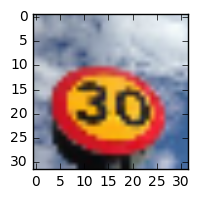


imagesFromInternet/image5.jpg


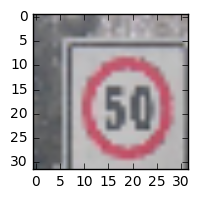


imagesFromInternet/image6.jpg


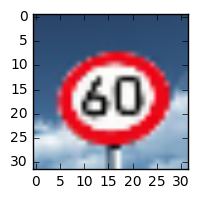


imagesFromInternet/image8.jpg


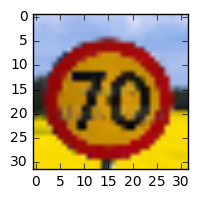


imagesFromInternet/image9.jpg


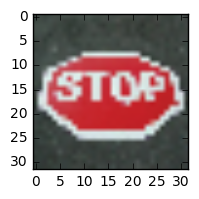

(32, 32, 3)
5
(5, 32, 32, 3)


In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
import os
import cv2

directoryFolder = 'imagesFromInternet/'
print("unsorted images-", os.listdir(directoryFolder))
print("\nsorted images-")
imagesTogether = []

# actual labels of images from internet
labels_actual = np.array([ 1, 2, 3, 4, 14]) 


# can also use this method for images input in sorted way, but using other way used below
#fileNames = np.array(['image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg', 'image5.jpg'])
#for file in fileNames:

for file in sorted(os.listdir(directoryFolder)):
    filePath = directoryFolder + file
    print()
    print(filePath)
    image = mpimg.imread(filePath)
    # resize image dimensions as required  for LENET architecture
    image = cv2.resize(image, (32, 32))
    plt.figure(figsize=(2,2))
    plt.imshow(image);plt.show()
    # combining images together in a list
    imagesTogether.append(image)

print(image.shape)
print(len(imagesTogether))
# converting images to numpy array
imagesTogetherNP=np.asarray(imagesTogether)
print(imagesTogetherNP.shape)



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I have chosen 5 images from internet to verify results. Ther is no special requirement or quality issues about the images. So I think there shouldn't be much issue for classifier to detect. 
Classification can only be difficult for classifier if two more classes look almost similar, then it would be tough for classifier to make exact right prediction. Also if there is some new image presented to classifier to predict, then it will surely predict it wrong as model was never trained to predict that kind of image.


In [15]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# preprocess the data such that it's in the range between -0.5 and 0.5.
# TODO: Implement data normalization here.
# for images from internet
imagesTogetherNP = imagesTogetherNP.astype('float32')
imagesTogetherNP /= 255 - 0.5


# find softmax probabilities for images downloaded
predictSoftmax = tf.nn.softmax(logits)

with tf.Session() as sess:
    # restore saved session
    saver.restore(sess, 'savedData4BestValidationAccuracyEPOCH/')
    print("Model restored")
    
    softmaxProb = sess.run(predictSoftmax, feed_dict={x: imagesTogetherNP, keep_prob: 1.0})
    
    labels_predicted = tf.argmax(softmaxProb, 1).eval()
    
    

Model restored


In [16]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

# Print softmax probabilities
print('Softmax Probabilities-\n',softmaxProb)
print()

with tf.Session() as sess:
    top_k = sess.run(tf.nn.top_k(tf.constant(softmaxProb), k=5))
    print('top_k certain predictions-\n', top_k)

    print()
    print("Labels actual   - ", labels_actual)
    print("Labels predicted- ", labels_predicted)
    print("top_k indices-\n", top_k[1])
    

Softmax Probabilities-
 [[  2.93423738e-02   5.95179856e-01   6.09844960e-02   2.15217005e-03
    8.45230359e-04   1.94264930e-02   1.89106725e-03   5.68200834e-03
    1.03607110e-03   1.38966134e-04   1.54123991e-04   4.67185527e-02
    3.11006187e-03   2.40127859e-03   1.98775157e-03   2.08485595e-04
    3.45275985e-05   1.40222535e-03   6.51731994e-03   5.28072298e-04
    6.29033986e-03   1.12159699e-02   1.80695293e-04   2.95916642e-03
    1.45155028e-03   2.10484657e-02   1.25182176e-03   4.46573045e-04
    3.56053188e-02   7.17982501e-02   9.51813813e-03   5.40763959e-02
    7.95905944e-04   3.59817241e-05   1.68689112e-05   1.36735369e-04
    3.60458107e-05   9.00814484e-06   1.86891688e-04   4.65576568e-06
    2.75204564e-03   5.23912568e-05   3.89624940e-04]
 [  5.88774541e-03   3.78817797e-01   3.13263834e-01   9.52853542e-03
    3.79072465e-02   2.35891603e-02   1.27022999e-04   1.63795501e-02
    1.87751825e-03   8.65256414e-04   2.01453920e-03   2.18488742e-02
    8.950605

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** The model isn't performing that good on internet images as it is performing on validation or test set. The model is displaying 60% accuracy ( 3 out of 5 images are predicted right as can be seen in "Labels Predicted and labels Actual arrays shown above) for predicting the  new images used from internet


## top_k indices and values 


In [17]:

print("top_k indices-    ", top_k.indices)
print("top_k values-    ", top_k.values)


top_k indices-     [[ 1 29  2 31 11]
 [ 1  2  4 33 13]
 [ 3  5  1  0  6]
 [26 18  4  1 25]
 [14 12 17 10  1]]
top_k values-     [[  5.95179856e-01   7.17982501e-02   6.09844960e-02   5.40763959e-02
    4.67185527e-02]
 [  3.78817797e-01   3.13263834e-01   3.79072465e-02   3.02166212e-02
    2.71224584e-02]
 [  6.53278530e-01   1.91233352e-01   8.93284008e-02   2.90471725e-02
    2.64468193e-02]
 [  2.49351695e-01   2.22324774e-01   1.60972103e-01   1.13445088e-01
    1.04529105e-01]
 [  9.82355177e-01   8.08607601e-03   7.38859642e-03   1.35293324e-03
    4.49238578e-04]]



## plot visualization of softmax probabilities  


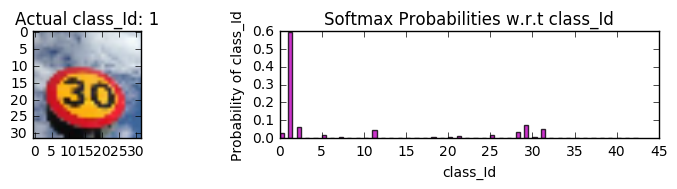

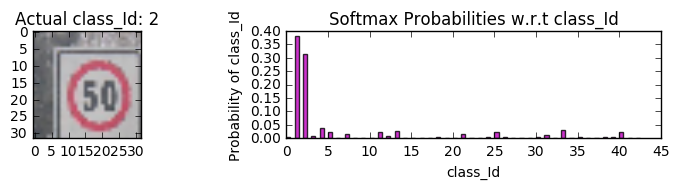

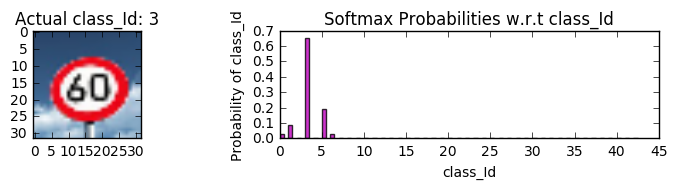

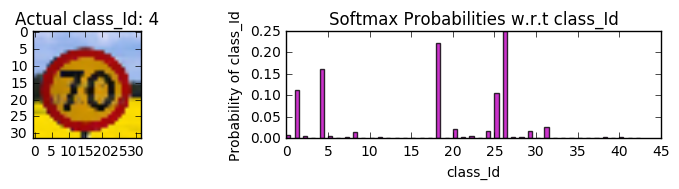

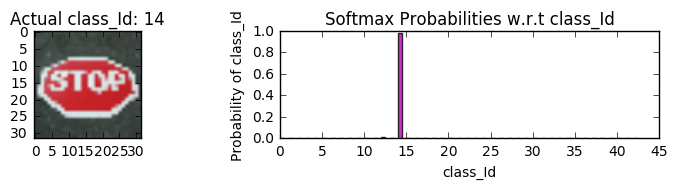

In [18]:
for i in np.arange(0,len(labels_predicted),1):
    plt.figure(figsize=(8,2))
    plt.subplot(121)
    plt.title("Actual class_Id: %s" % (labels_actual[i]));
    plt.imshow(imagesTogetherNP[i]);
        
    plt.subplot(122)
    plt.bar(class_index , softmaxProb[i], 0.5, alpha = 0.8, color='m')
    plt.xlabel('class_Id'); plt.ylabel('Probability of class_Id');
    plt.title('Softmax Probabilities w.r.t class_Id');
    plt.tight_layout()
    plt.show()
    

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** Yes, the model is either predicting the image accurately or atleast in top 5 predictions. 

Model is predicting the 1st image correctly, displaying traffic sign of 30km/hr with 60% certainity.

Model is predicting the 2nd image wrong, displaying traffic sign of 50km/hr with 38% certainity. Exact traffic sign is predicted right at 2nd place in top_k matrix with 30% certainity.

Model is predicting the 3rd image correctly, displaying traffic sign of 60km/hr with 65% certainity.

Model is predicting the 4th image wrong, displaying traffic sign of 70km/hr with 25% certainity. Exact traffic sign is predicted right at 3rd place in top_k matrix with 17% certainity

Model is fully certain about 5th image, displaying a stop sign with approximately 99% certainity.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.